In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('ols data.csv')

In [3]:
df.head()

,AttendanceTime,population density (Per Hectares),building density (Per Hectares),traffic (million per mile),London fire station number,road density
0,332.79,56.64,20.1,422,2,340.4
1,324.95,46.00,17.6,1033,4,764.3
2,335.25,38.78,15.3,661,3,550.5
3,328.16,75.81,27.9,585,3,489.3
4,347.32,22.16,9.3,785,4,904.2


In [4]:
df.describe()

,AttendanceTime,population density (Per Hectares),building density (Per Hectares),traffic (million per mile),London fire station number,road density
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,304.76000,75.007273,30.978788,561.000000,3.121212,448.672727
std,27.32213,40.523638,18.096301,270.468459,1.053493,185.066402
min,253.33000,22.160000,9.000000,82.000000,1.000000,55.400000
25%,282.17000,46.000000,18.200000,420.000000,2.000000,340.400000
50%,306.61000,57.300000,22.700000,503.000000,3.000000,429.500000
75%,323.63000,106.980000,45.500000,732.000000,4.000000,534.000000
max,362.34000,167.000000,70.800000,1317.000000,5.000000,904.200000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AttendanceTime                     33 non-null     float64
 1   population density (Per Hectares)  33 non-null     float64
 2   building density (Per Hectares)    33 non-null     float64
 3   traffic (million per mile)         33 non-null     int64  
 4   London fire station number         33 non-null     int64  
 5   road density                       33 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


Text(0.5, 1.0, 'Visualization of outliers')

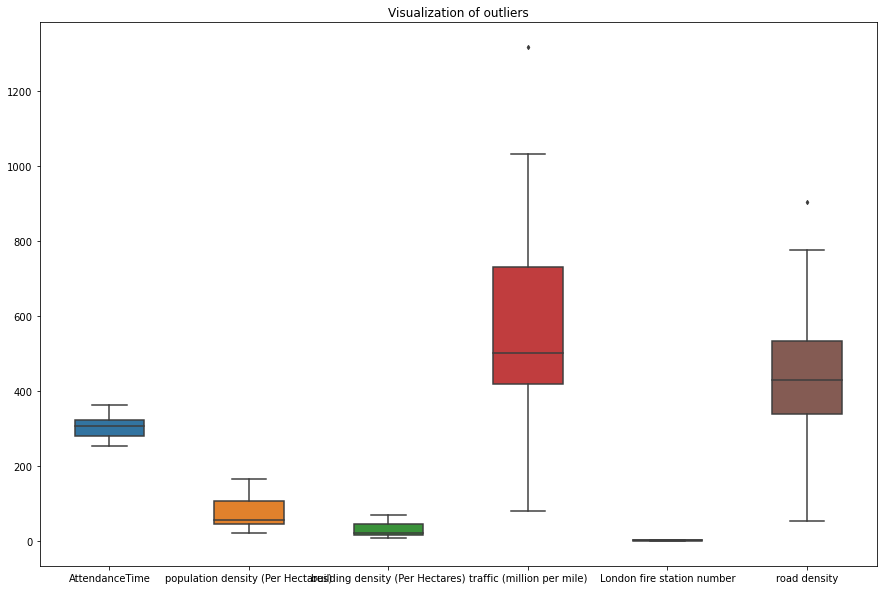

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization of outliers")

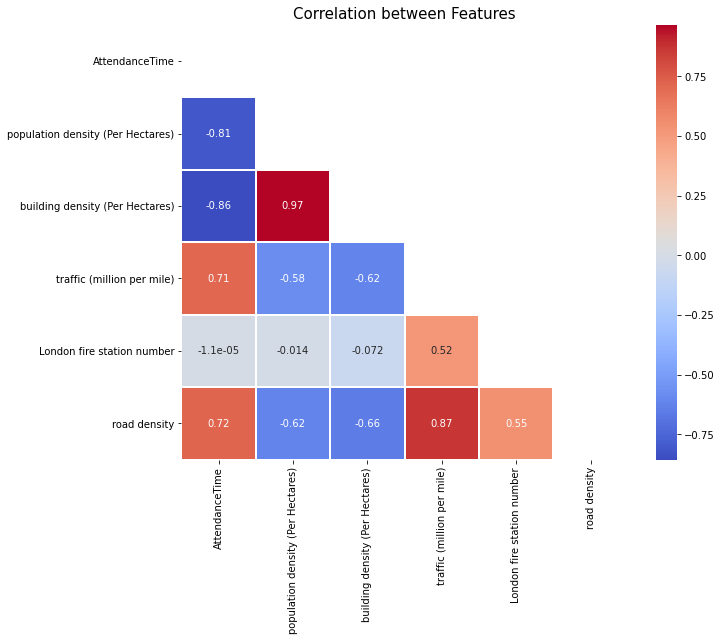

In [7]:
corr = df.corr()

plt.figure(figsize= (10,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidths= 1, annot= True)
plt.title('Correlation between Features', fontsize= 15)
plt.show()

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [11]:
x=sm.add_constant(df.drop('AttendanceTime',axis=1))

In [12]:
vif=pd.DataFrame()
vif['features']=x.columns

In [13]:
vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]

In [14]:
vif

,features,VIF Factor
0,const,27.188582
1,population density (Per Hectares),16.016672
2,building density (Per Hectares),16.625620
3,traffic (million per mile),4.370987
4,London fire station number,1.960868
5,road density,5.340235


In [15]:
x=x.drop('population density (Per Hectares)',axis=1)

In [16]:
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif

,features,VIF Factor
0,const,27.004976
1,building density (Per Hectares),2.300284
2,traffic (million per mile),4.370516
3,London fire station number,1.869146
4,road density,5.307912


In [17]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [36]:
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included = list(initial_list)
    while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

# backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
    return included

In [58]:
predictors_data = df.drop(columns=['AttendanceTime'], axis=1)
response_data = df[['AttendanceTime']]

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_data, y=response_data)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

Add  building density               with p-value 2.00942e-10
Add  traffic (million per mile)     with p-value 0.00878228
Add  London fire station number     with p-value 0.000918952
The predictors that are selected by stepwise regression are:
['building density', 'traffic (million per mile)', 'London fire station number']


In [19]:
from statsmodels.formula.api import ols 

In [10]:
y1=df[['AttendanceTime']]
#x1=df[['population density (Per Hectares)']]
Building_density=df[['building density (Per Hectares)']]
Traffic=df[['traffic (million per mile)']]
Fire_station=df[['London fire station number']]
Road_density=df[['road density']]

In [11]:
import statsmodels.formula.api as sm  


In [12]:
result=sm.ols(formula="y1~+Building_density+Traffic+Fire_station+Road_density",data = df).fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     52.10
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           1.43e-12
Time:                        05:07:35   Log-Likelihood:                -120.27
No. Observations:                  33   AIC:                             250.5
Df Residuals:                      28   BIC:                             258.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          314.8252      9.094  

In [22]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [23]:
population = pd.read_csv("population data.csv")

In [24]:
population

,gss_code,BoroughName,population
0,E09000002,Barking and Dagenham,214107
1,E09000003,Barnet,399007
2,E09000004,Bexley,249301
3,E09000005,Brent,327753
4,E09000006,Bromley,332752
5,E09000007,Camden,279516
6,E09000001,City of London,10938
7,E09000008,Croydon,388563
8,E09000009,Ealing,340341
9,E09000010,Enfield,333587


In [25]:
boros = gpd.read_file('London_boroughs.gpkg')

In [26]:
populationmerge = pd.merge(boros, population, left_on='GSS_CODE', right_on='gss_code', how='inner')
print(populationmerge.shape)
print(type(populationmerge))

(33, 9)
<class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:title={'center':'London Borough Population 2020'}>

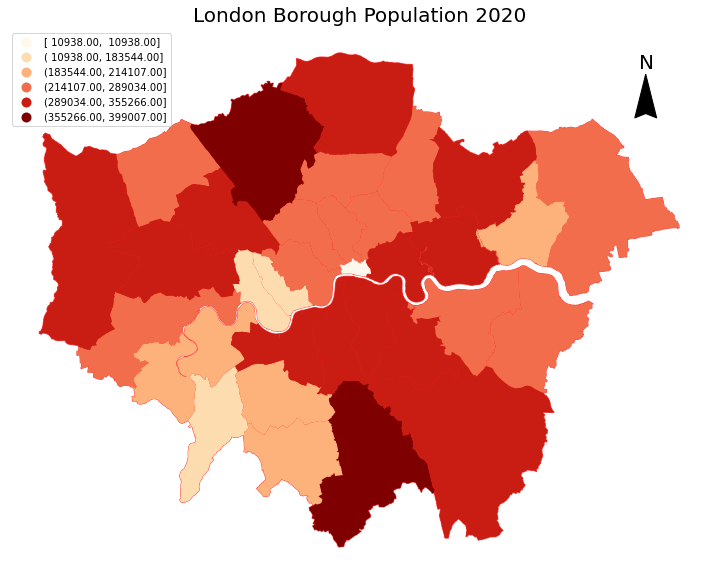

In [37]:
ax = populationmerge.plot(figsize=(15,10), edgecolor='red', facecolor='none', linewidth=1, alpha=0.75)
ax.set_title('London Borough Population 2020', fontdict={'fontsize':'20', 'fontweight':'3'})
ax.text(x=558300, y=199500, s='N', fontsize=20)
ax.arrow(558900, 198000, 0, 1000, length_includes_head=True,
          head_width=2000, head_length=4000, overhang=.1, facecolor='k')
ax.axis('off') 
populationmerge.plot(markersize=1, column='population', scheme='NaturalBreaks',k=6, cmap='OrRd', ax=ax, legend=True)

